# **<center>SPOTIFY SONG POPULARITY PREDICTION</center>** 


**Problem Statement**: To predict the popularity of a given song. <br>

<p>&ensp;&ensp;&ensp;&ensp;The project aims to predict the popularity of a song based on song metrics such as key, danceability, acousticness, etc.</p> <br>

**<p>Data Collection:</p>**https://www.kaggle.com/


In [1]:
# Importing required library
import numpy as np    ##for working with array
import pandas as pd   #for working with data frames
import seaborn as sns # for data visualization 
#sns.set_theme(style='white')
#sns.color_palette('pastel', as_cmap=True)
import matplotlib.pyplot as plt
import random
import warnings
import numpy
from sklearn import metrics
warnings.filterwarnings("ignore")

In [2]:
#load the data in the dataframe
df=pd.read_csv("SpotifyAudioFeaturesApril2019.csv")

### **Data Pre-processing**

In [3]:
#Printing Number of rows and columns in dataset
r_count,c_count=df.shape
print("Row Count:",r_count)
print("Column Count:",c_count)

Row Count: 130663
Column Count: 17


In [4]:
#Returns the index object with column name
print(df.keys())

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


In [5]:
#Returns the specified number of rows and columns from the top.
df.head(4)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.02940,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0


In [6]:
#Descrebing the values by fing the count, mean, standard deviation, minimum and maximum values
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [7]:
#printing the data types of each column
datatypes=df.dtypes
datatypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

In [8]:
#prints the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [9]:
#Removing duplicate values (track_id)
df.drop_duplicates(subset='track_id',inplace=True)

**Observation** Duplicates are now dropped from the dataset. 

In [10]:
#Displaying the count after removal of duplicates
r_count,c_count=df.shape
print("Row Count:",r_count)
print("Column Count:",c_count)

Row Count: 130326
Column Count: 17


In [11]:
#Checking for null values. df.isnull().sum is used to find the total no. of null value presented in the dataset. If null value is present then it is dropped using df.dropna().
df.isnull().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

In [12]:
columns_to_drop = ['artist_name', 'track_id', 'track_name']
df = df.drop(columns=columns_to_drop)

In [13]:
print(df.keys())

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')



**Observation** There are no missing values in the dataset. 

In [14]:
#Change songs duration from milliseconds to seconds
df['duration_ms']=df['duration_ms']/1000
df.rename(columns={'duration_ms':'duration_s'},inplace=True)

In [15]:
print(df.keys())

Index(['acousticness', 'danceability', 'duration_s', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')


### **Exploratory Data Analysis**

In [16]:
#Number of popular songs in the dataset with the score above 90.
total = df.shape[0]
probability = df[df['popularity'] >= 90].shape[0]
print("Number of Song with more than 90 popularity score:", probability)

Number of Song with more than 90 popularity score: 69


**Observation** Among 10000+ songs, only 69 songs have popularity more than 90. 

In [17]:
total = df.shape[0]
probability = df[df['popularity'] == 0].shape[0]
print("Number of Song with 0 popularity score:", probability)

Number of Song with 0 popularity score: 18888


In [18]:
total = df.shape[0]
probability = df[df['popularity'] > 0].shape[0]
print("Number of Song with greater than 0 popularity score:", probability)

Number of Song with greater than 0 popularity score: 111438


In [19]:
#Percentage of popular songs in the dataset.
total = df.shape[0]
popularity_score_more_than_40 = df[df['popularity'] > 40].shape[0]
probability = (popularity_score_more_than_40/total)*100
print("Probability of song getting more than 40 in popularity :", probability)

Probability of song getting more than 40 in popularity : 21.629605757868728


**Observation** 21% of songs have popularity score more than 40

In [20]:
#Percentage of popular songs in the dataset.
total = df.shape[0]
popularity_score_more_than_50 = df[df['popularity'] > 50].shape[0]
probability = (popularity_score_more_than_50/total)*100
print("Probability of song getting more than 50 in popularity :", probability)

Probability of song getting more than 50 in popularity : 12.066663597440265


Text(0.5, 1.0, 'Popularity Distribution')

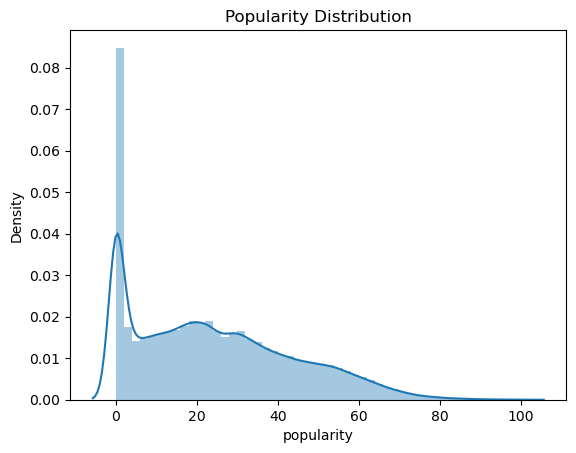

In [21]:
#distribution plot of target variable
#normal distribution
sns.distplot(df['popularity']).set_title('Popularity Distribution')

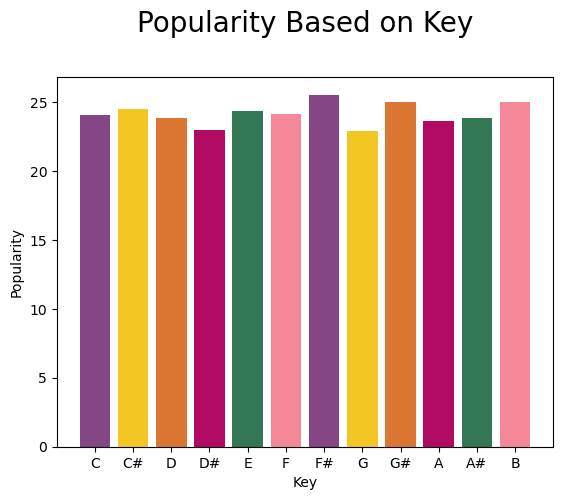

In [22]:
keypop = pd.DataFrame(df.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure()
plt.bar( keypop['key'],
         keypop['popularity'],
         color = ['#844685','#f3c623','#DC7633','#b00a62','#337755','#f48798'])
plt.title('Popularity Based on Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()
#ax.axes.get_xaxis().set_visible(True)

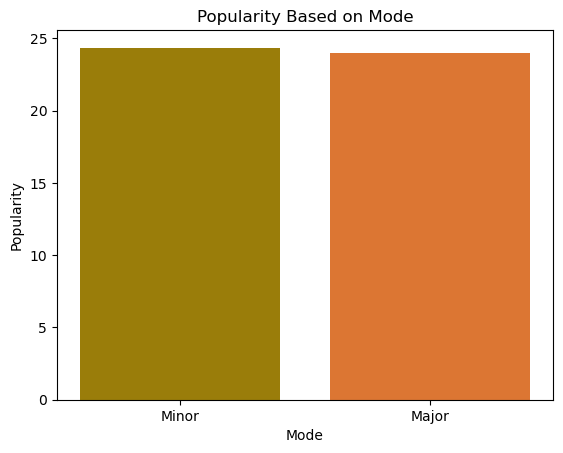

In [23]:
modepop = pd.DataFrame(df.groupby('mode')['popularity'].mean()).reset_index()
modepop.replace({'mode' : { 0 : 'Minor', 1 : 'Major' }} , inplace=True)

fig = plt.figure()
plt.bar( modepop['mode'],
         modepop['popularity'],
         color = ['#9A7D0A','#DC7633',])
plt.title('Popularity Based on Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.show()
#ax.axes.get_xaxis().set_visible(True)

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

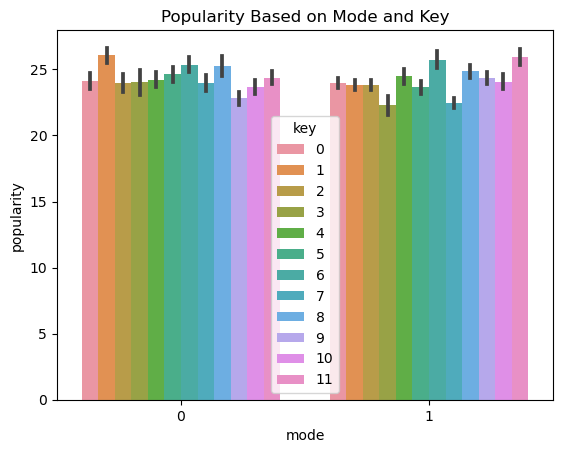

In [24]:
#Popularity based on mode and key
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

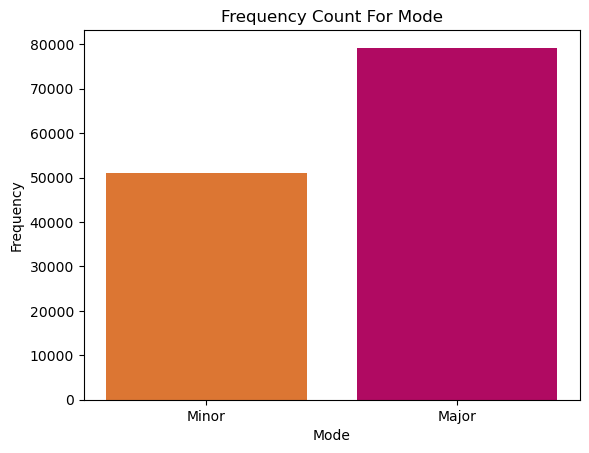

In [25]:
mode = pd.DataFrame(df['mode'].value_counts()).reset_index().sort_values('index')
mode.replace({'index': {0: 'Minor', 1: 'Major'}}, inplace=True)
fig = plt.figure()
plt.bar(mode['index'], mode['mode'], color=['#DC7633','#b00a62'])
plt.title('Frequency Count For Mode')
plt.xlabel('Mode')
plt.ylabel('Frequency')
plt.show()

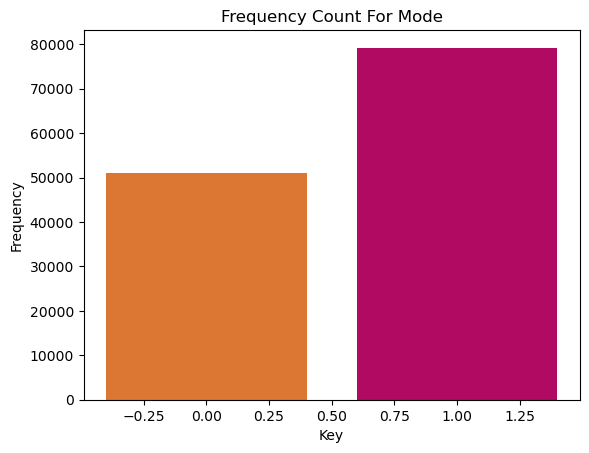

In [26]:
key1 = pd.DataFrame(df['mode'].value_counts()).reset_index().sort_values('index')
key1.replace({'mode' : { 0 : 'Minor', 1 : 'Major' }} , inplace=True)
fig = plt.figure()
plt.bar( key1['index'],
         key1['mode'],
         color = ['#DC7633','#b00a62'])
plt.title('Frequency Count For Mode')
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.show()

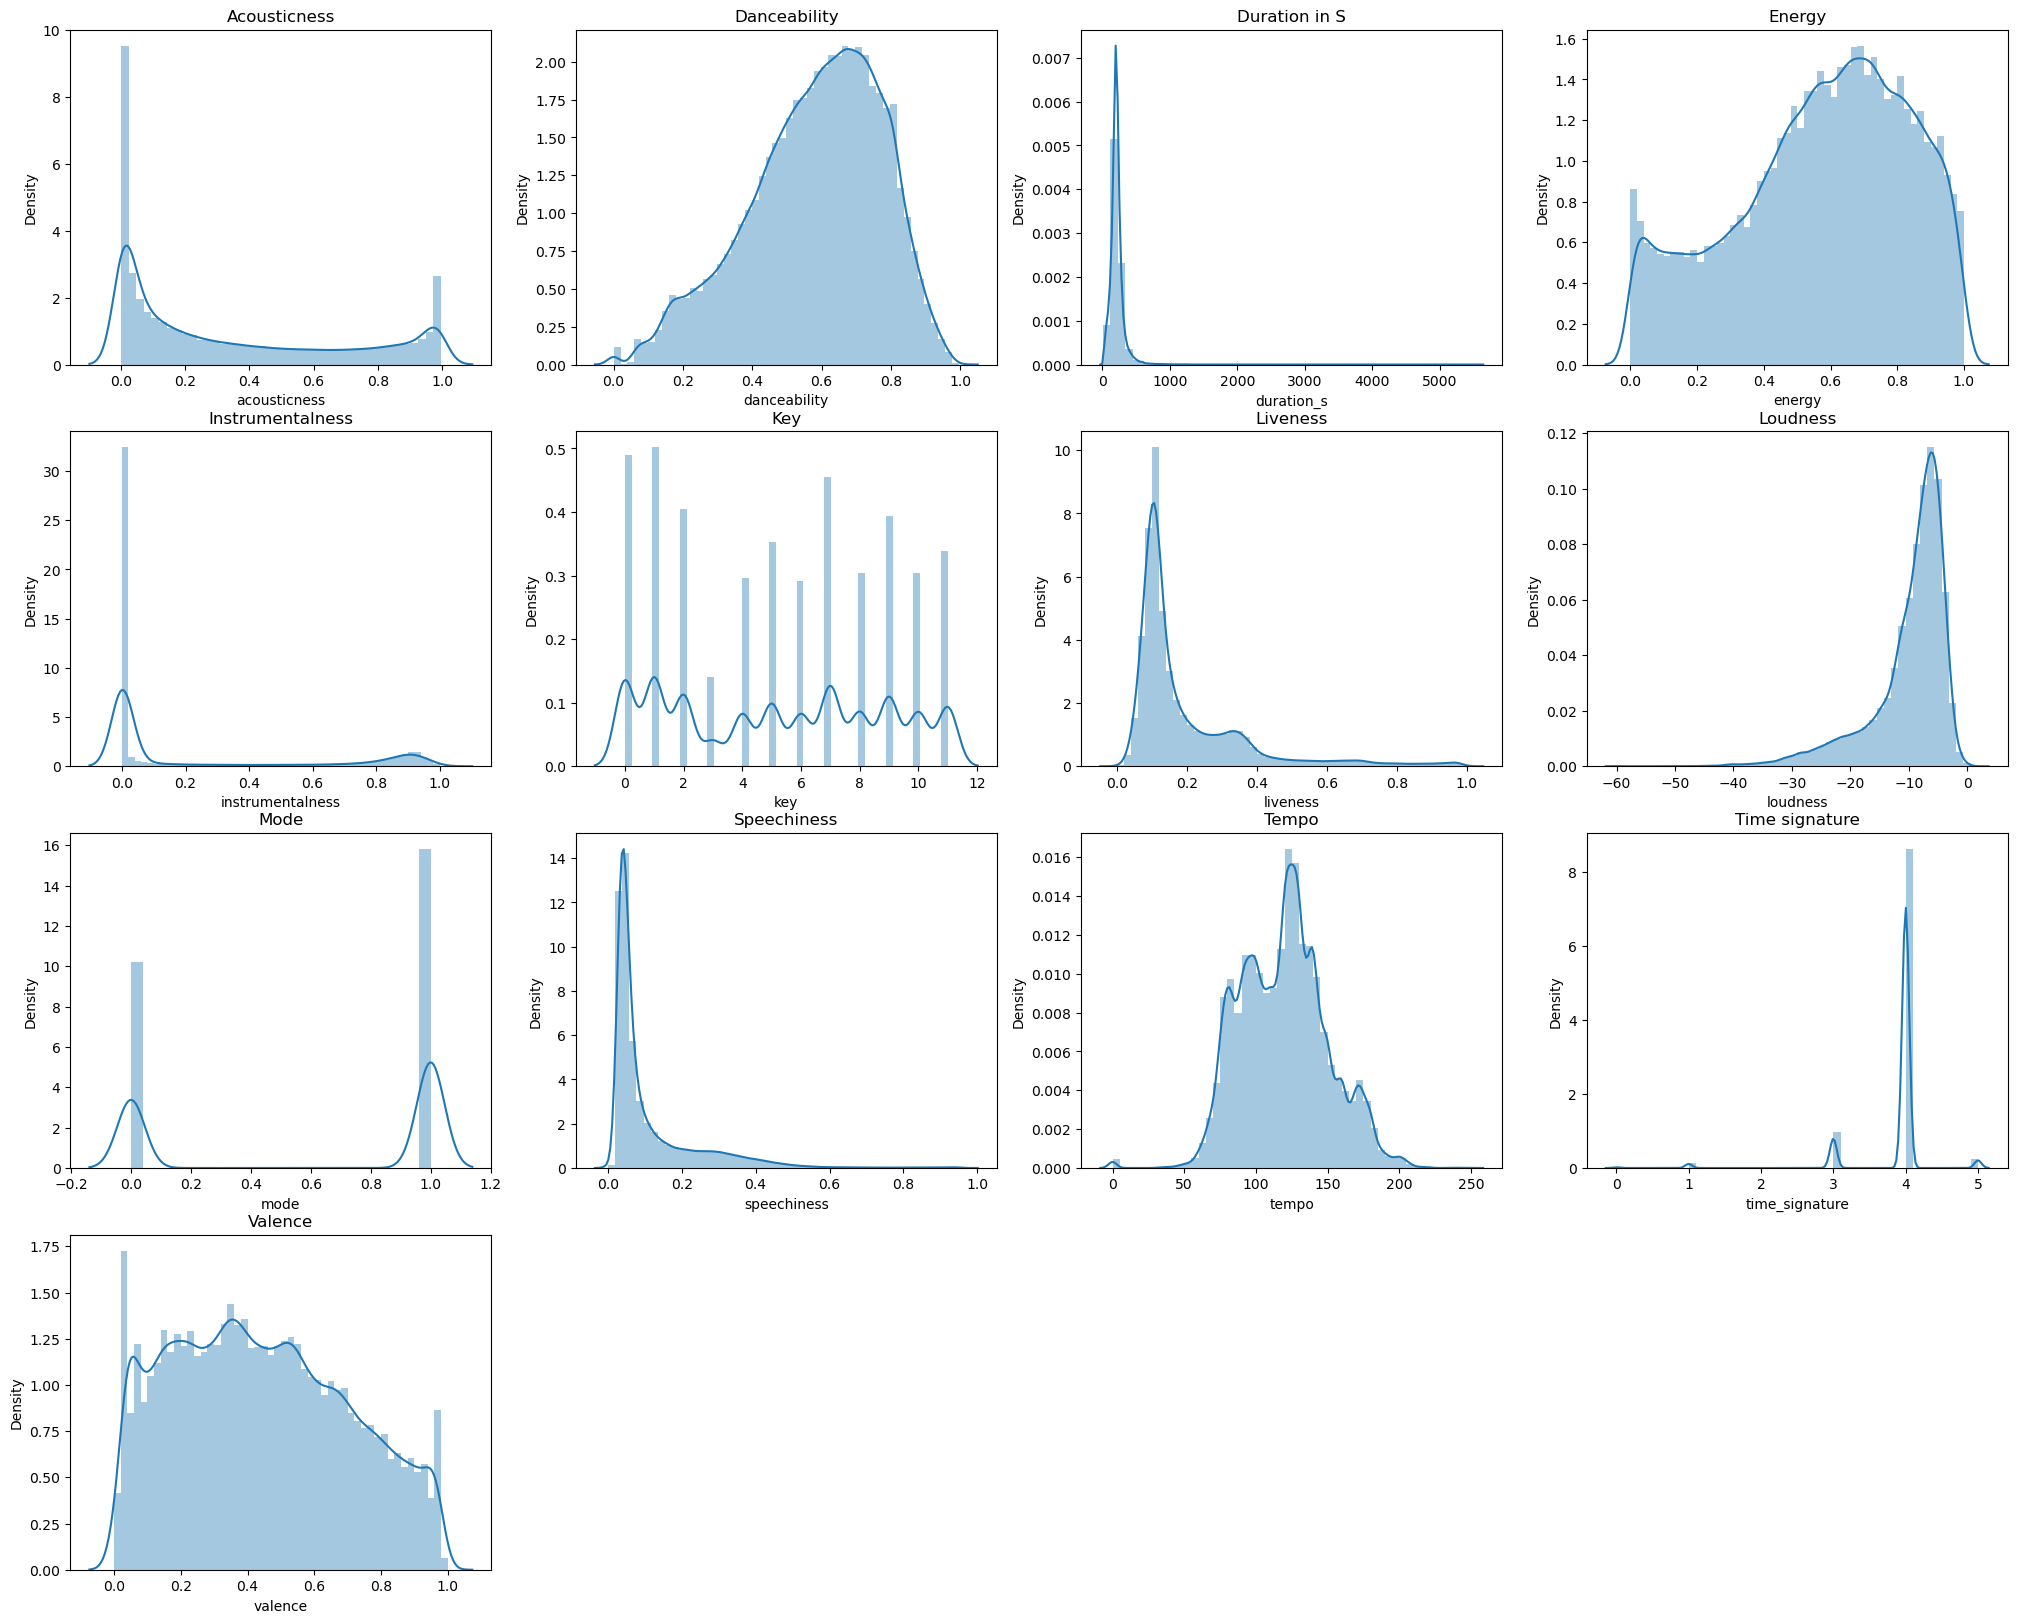

In [27]:
#create dimensions of subplot (rows, columns)
fig, axes = plt.subplots(4, 4, figsize = (25,20))

#Create chart in each subplot
#subplot 1
#sns.lineplot(y = 'acousticness', x = 'popularity', data = df, ax=axes[0,0])
sns.distplot(df['acousticness'],ax=axes[0,0]).set_title('Acousticness')

#subplot 2
sns.distplot(df['danceability'],ax=axes[0,1]).set_title('Danceability')

#subplot 3
sns.distplot(df['duration_s'],ax=axes[0,2]).set_title('Duration in S')

#subplot 4
sns.distplot(df['energy'],ax=axes[0,3]).set_title('Energy')


#subplot 5
sns.distplot(df['instrumentalness'],ax=axes[1,0]).set_title('Instrumentalness')

#subplot 6
sns.distplot(df['key'],ax=axes[1,1]).set_title('Key')

#subplot 7
sns.distplot(df['liveness'],ax=axes[1,2]).set_title('Liveness')

#subplot 8
sns.distplot(df['loudness'],ax=axes[1,3]).set_title('Loudness')

#subplot 9
sns.distplot(df['mode'],ax=axes[2,0]).set_title('Mode')

#subplot 10
sns.distplot(df['speechiness'],ax=axes[2,1]).set_title('Speechiness')

#subplot 11
sns.distplot(df['tempo'],ax=axes[2,2]).set_title('Tempo')

#subplot 12
sns.distplot(df['time_signature'],ax=axes[2,3]).set_title('Time signature')

#subplot 13
sns.distplot(df['valence'],ax=axes[3,0]).set_title('Valence')
fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])
fig.delaxes(axes[3][3])

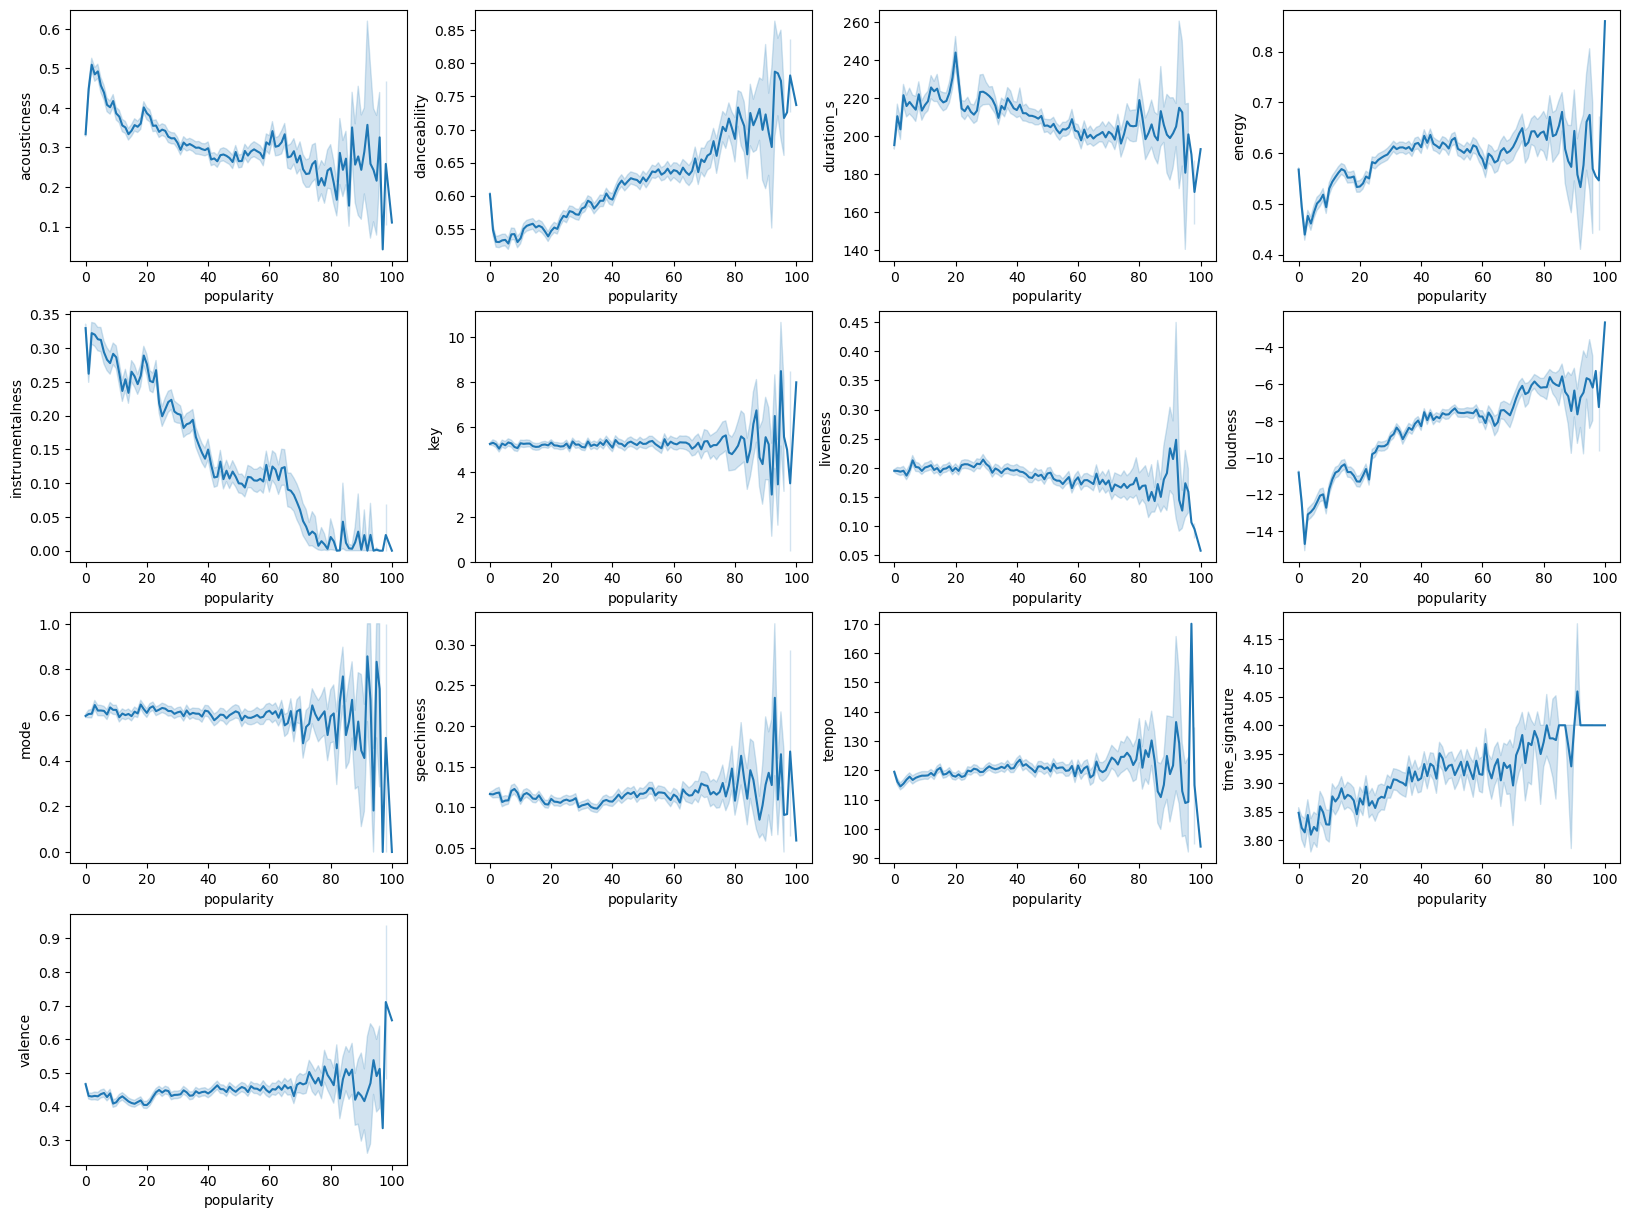

In [28]:
#create dimensions of subplot (rows, columns)
fig, axes = plt.subplots(4, 4, figsize = (20,15))

#Create chart in each subplot
#subplot 1
sns.lineplot(y = 'acousticness', x = 'popularity', data = df, ax=axes[0,0])

#subplot 2
sns.lineplot(y = 'danceability', x = 'popularity', data = df, ax=axes[0,1])

#subplot 3
sns.lineplot(y = 'duration_s', x = 'popularity', data = df, ax=axes[0,2])

#subplot 4
sns.lineplot(y = 'energy', x = 'popularity', data = df, ax=axes[0,3])

#instrument, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence 
#subplot 5
sns.lineplot(y = 'instrumentalness', x = 'popularity', data = df, ax=axes[1,0])

#subplot 6
sns.lineplot(y = 'key', x = 'popularity', data = df, ax=axes[1,1])

#subplot 7
sns.lineplot(y = 'liveness', x = 'popularity', data = df, ax=axes[1,2])

#subplot 8
sns.lineplot(y = 'loudness', x = 'popularity', data = df, ax=axes[1,3])

#subplot 9
sns.lineplot(y = 'mode', x = 'popularity', data = df, ax=axes[2,0])

#subplot 10
sns.lineplot(y = 'speechiness', x = 'popularity', data = df, ax=axes[2,1])

#subplot 11
sns.lineplot(y = 'tempo', x = 'popularity', data = df, ax=axes[2,2])

#subplot 12
sns.lineplot(y = 'time_signature', x = 'popularity', data = df, ax=axes[2,3])

#subplot 13
sns.lineplot(y = 'valence', x = 'popularity', data = df, ax=axes[3,0])
fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])
fig.delaxes(axes[3][3])

### **Correlation Matrix**


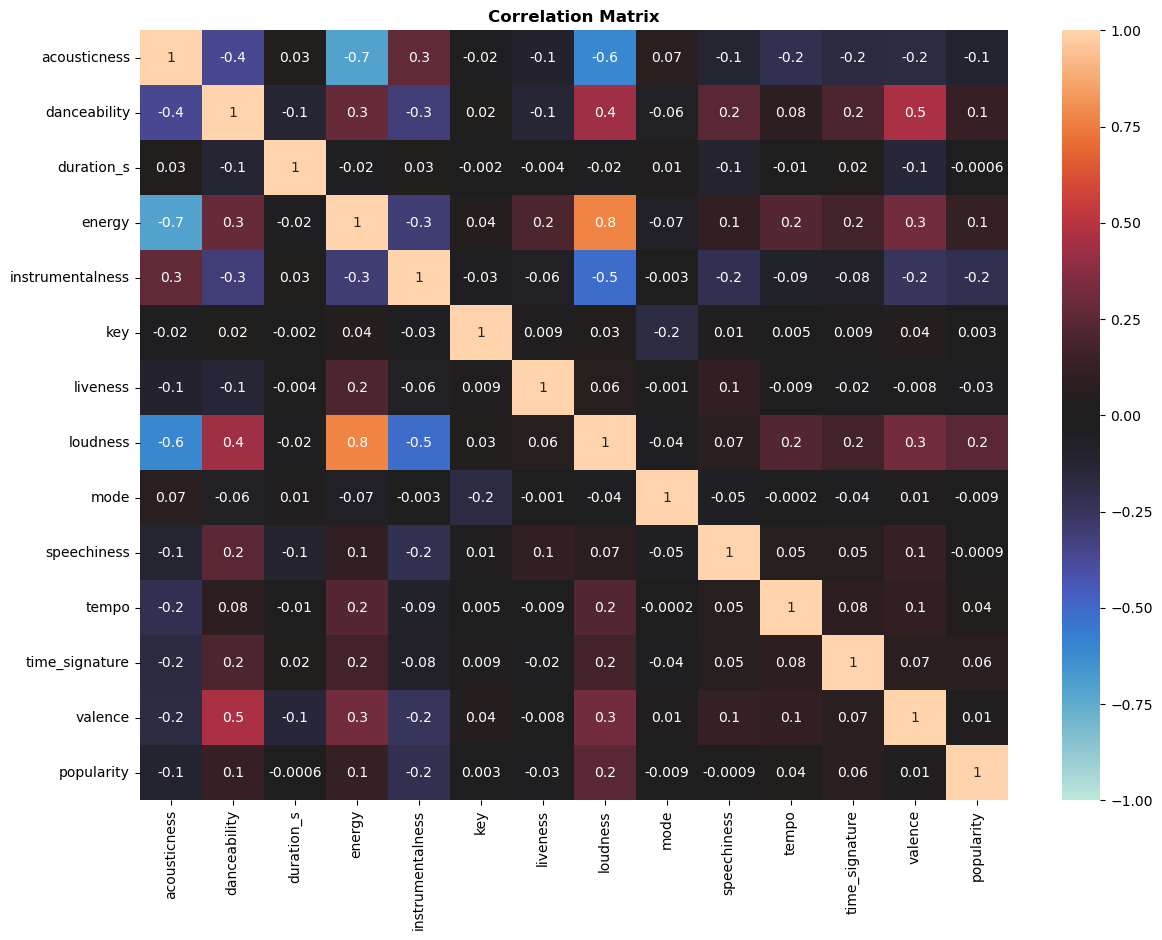

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')
plt.show()

**Observation** Correlation between loudness and energy is 0.8 which is strong and correlation between danceability and valence is 0.5 which is moderate. Except two of them all the correlations are quite low. 


In [30]:
corr_mat = df.corr()
corr_pairs = corr_mat.unstack()
pos_corr = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1)]
print("Strong Positive Correlation is observed in the following pairs: \n", pos_corr)

neg_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nStrong Negative Correlation is observed in the following pairs: \n", neg_corr)

Strong Positive Correlation is observed in the following pairs: 
 energy    loudness    0.766641
loudness  energy      0.766641
dtype: float64

Strong Negative Correlation is observed in the following pairs: 
 acousticness      energy             -0.710062
                  loudness           -0.603249
energy            acousticness       -0.710062
instrumentalness  loudness           -0.508276
loudness          acousticness       -0.603249
                  instrumentalness   -0.508276
dtype: float64


### **Feature Engineering**

Popularity score must be converted into binary value. Here the songs score above 50 as "popular" and encode that as 1 and songs score below 50 as "not popular" and encode that as 0. 


In [31]:
df.loc[df['popularity'] < 50, 'popularity'] = 0 
df.loc[df['popularity'] >= 50, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
2,0.02500,0.603,138.913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,1
50,0.12200,0.552,241.160,0.789,0.000005,9,0.0874,-5.449,1,0.0242,93.938,4,0.3490,1
60,0.02710,0.890,200.168,0.454,0.000004,8,0.1570,-8.777,1,0.2600,140.041,4,0.4250,1
157,0.78600,0.524,176.135,0.307,0.000000,9,0.1110,-9.753,1,0.0465,153.157,4,0.4080,1
180,0.69600,0.783,251.992,0.432,0.000001,0,0.0382,-5.551,1,0.0340,136.092,3,0.7200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130656,0.66800,0.211,279.070,0.284,0.000111,1,0.1050,-10.317,1,0.0385,83.905,4,0.0638,1
130658,0.00678,0.601,190.539,0.801,0.000000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,1
130659,0.91800,0.387,194.583,0.249,0.000000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,1
130661,0.00790,0.772,180.013,0.510,0.000000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,1


### **Model fitting and predicting**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

For model building, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.


In [33]:
features = ["acousticness","danceability" ,"duration_s", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature","valence"]

80% of the dataframe for training and 20% of the dataframe for testing.


In [34]:
training = df.sample(frac = 0.8,random_state = 42)
x = training[features]
y = training['popularity']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
#Number of values in train and test data
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (83408, 12)
x_test:  (20853, 12)
y_train:  (83408,)
y_test:  (20853,)


**1. Logistic Regression**

LR is one of the basic classiﬁcation method is used prediction of categorical variables.The problem has two possible outputs popular(1) and unpopular(0) which is suitable for binary logistic regression. 

In [37]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

LR_Predict1 = LR_Model.predict(X_train)
LR_Accuracy1 = accuracy_score(y_train, LR_Predict1)
print("Training Accuracy: " + str(LR_Accuracy1))

LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Testing Accuracy: " + str(LR_Accuracy))

Training Accuracy: 0.8710915020141953
Testing Accuracy: 0.8677888073658466


**2. K-Nearest Neighbours Classfiers**

In [38]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)

KNN_Predict1 = KNN_Model.predict(X_train)
KNN_Accuracy1 = accuracy_score(y_train, KNN_Predict1)
print("Training Accuracy: " + str(KNN_Accuracy1))

KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Testing Accuracy: " + str(KNN_Accuracy))

Training Accuracy: 0.8774098407826587
Testing Accuracy: 0.8496139644175897


**3. Random Classifier**

In [39]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)

RFC_Predict1 = RFC_Model.predict(X_train)
RFC_Accuracy1 = accuracy_score(y_train, RFC_Predict1)
print("Training Accuracy: " + str(RFC_Accuracy1))

RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Testing Accuracy: " + str(RFC_Accuracy))

Training Accuracy: 0.9995563974678688
Testing Accuracy: 0.8675490337121757


**4. Decision Tree Classifier**

In [40]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)

DT_Predict1 = DT_Model.predict(X_train)
DT_Accuracy1 = accuracy_score(y_train, DT_Predict1)
print("Training Accuracy: " + str(DT_Accuracy1))

DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Testing Accuracy: " + str(DT_Accuracy))

Training Accuracy: 0.999568386725494
Testing Accuracy: 0.7802234690452213



### **Evaluation of model**

In [41]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                           'Train Accuracy': [LR_Accuracy1,
                                                         RFC_Accuracy1,
                                                         KNN_Accuracy1,
                                                         DT_Accuracy1],
                                            'Test Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})
model_performance_accuracy.sort_values(by = "Test Accuracy", ascending = False)

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.871092,0.867789
1,RandomForestClassifier,0.999556,0.867549
2,KNeighborsClassifier,0.877410,0.849614
3,DecisionTreeClassifier,0.999568,0.780223


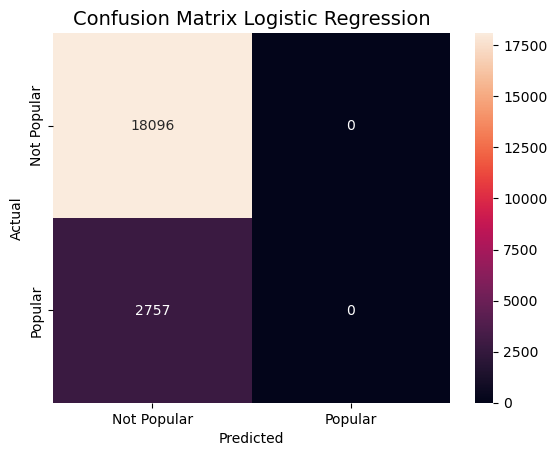

In [42]:
cm = confusion_matrix(y_test,LR_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Not Popular','Popular'],
            yticklabels=['Not Popular','Popular']
           )
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix Logistic Regression',fontsize=14)
plt.show()

In [43]:
print('Classification report Logistic Regression: \n',classification_report(y_test,LR_Predict))

Classification report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     18096
           1       0.00      0.00      0.00      2757

    accuracy                           0.87     20853
   macro avg       0.43      0.50      0.46     20853
weighted avg       0.75      0.87      0.81     20853



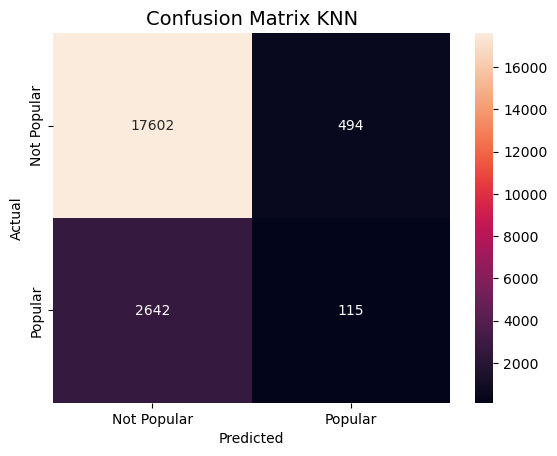

In [44]:
cm = confusion_matrix(y_test,KNN_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Not Popular','Popular'],
            yticklabels=['Not Popular','Popular']
           )
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix KNN',fontsize=14)
plt.show()

In [45]:
print('\nClassification report K-Nearest Neighbour: \n',classification_report(y_test,KNN_Predict))


Classification report K-Nearest Neighbour: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     18096
           1       0.19      0.04      0.07      2757

    accuracy                           0.85     20853
   macro avg       0.53      0.51      0.49     20853
weighted avg       0.78      0.85      0.81     20853



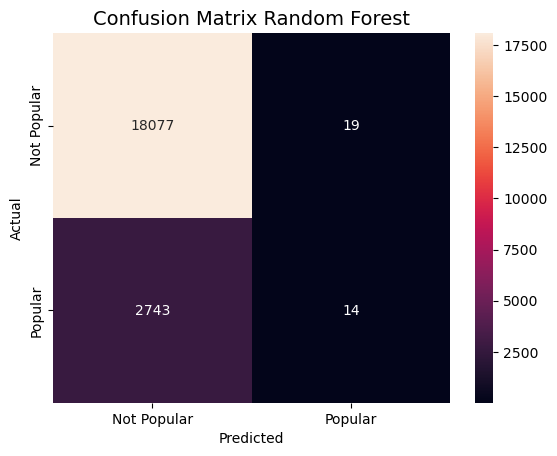

In [46]:
cm = confusion_matrix(y_test,RFC_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Not Popular','Popular'],
            yticklabels=['Not Popular','Popular']
           )
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix Random Forest',fontsize=14)
plt.show()

In [47]:
print('\nClassification report Random Forest: \n',classification_report(y_test,RFC_Predict))


Classification report Random Forest: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     18096
           1       0.42      0.01      0.01      2757

    accuracy                           0.87     20853
   macro avg       0.65      0.50      0.47     20853
weighted avg       0.81      0.87      0.81     20853



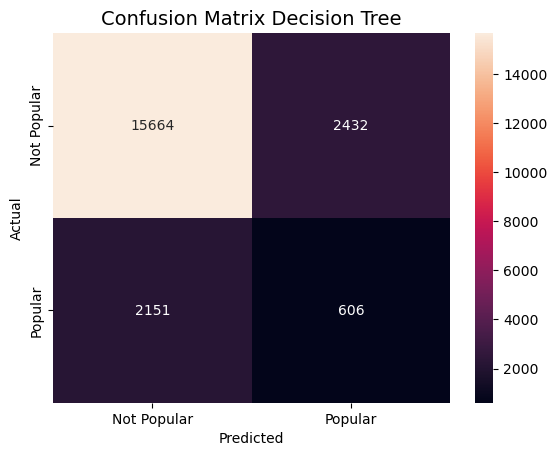

In [48]:
cm = confusion_matrix(y_test,DT_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Not Popular','Popular'],
            yticklabels=['Not Popular','Popular']
           )
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix Decision Tree',fontsize=14)
plt.show()

In [49]:
print('\nClassification report Decision Tree: \n',classification_report(y_test,DT_Predict))


Classification report Decision Tree: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     18096
           1       0.20      0.22      0.21      2757

    accuracy                           0.78     20853
   macro avg       0.54      0.54      0.54     20853
weighted avg       0.79      0.78      0.78     20853



In [50]:
print('Classification report Logistic Regression: \n',classification_report(y_test,LR_Predict))
print('\nClassification report K-Nearest Neighbour: \n',classification_report(y_test,KNN_Predict))
print('\nClassification report Random Forest: \n',classification_report(y_test,RFC_Predict))
print('\nClassification report Decision Tree: \n',classification_report(y_test,DT_Predict))

Classification report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     18096
           1       0.00      0.00      0.00      2757

    accuracy                           0.87     20853
   macro avg       0.43      0.50      0.46     20853
weighted avg       0.75      0.87      0.81     20853


Classification report K-Nearest Neighbour: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     18096
           1       0.19      0.04      0.07      2757

    accuracy                           0.85     20853
   macro avg       0.53      0.51      0.49     20853
weighted avg       0.78      0.85      0.81     20853


Classification report Random Forest: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     18096
           1       0.42      0.01      0.01      2757

    accuracy                           0.87     208